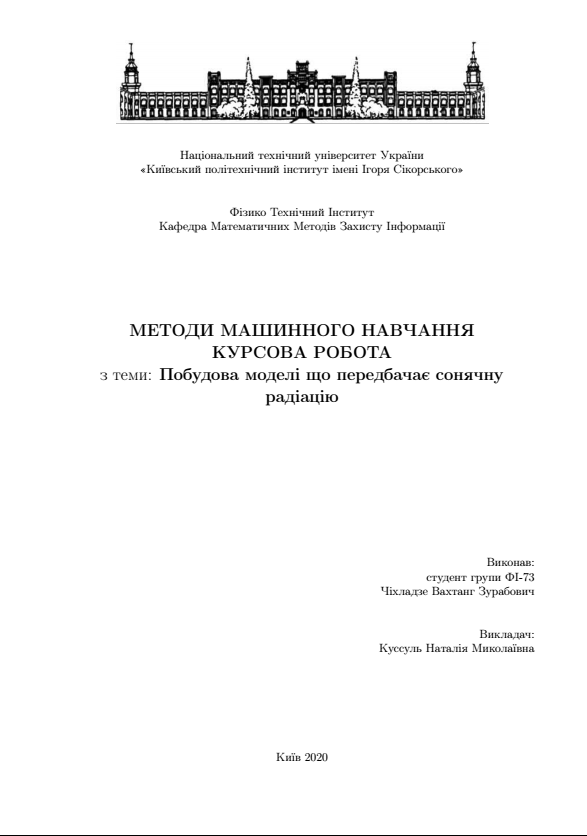

In [1]:
import os
from IPython.display import Image
Image(filename = './course_work_ChihladzeVahtangFI-73.png')

# Мета роботи

Отримати досвід використання основних методів та засобів машинного навчання та аналізу даних у середовищі розробки IPython Notebook на реальних наборах даних.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

# 1.Проаналізувати набір даних на наявність пропущених значень та NaN. У випадку наявності таких значень їх потрібно замінити за допомогою методу ковзного вікна.

In [3]:
solar = pd.read_csv('SolarPrediction.csv')

In [4]:
solar.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [5]:
solar.isnull().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [6]:
solar.head()

UNIXTime                   Data      Time  Radiation  Temperature  \
0  1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1  1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2  1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3  1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4  1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   

   Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  
0     30.46        59                  177.39   5.62    06:13:00   18:13:00  
1     30.46        58                  176.78   3.37    06:13:00   18:13:00  
2     30.46        57                  158.75   3.37    06:13:00   18:13:00  
3     30.46        60                  137.71   3.37    06:13:00   18:13:00  
4     30.46        62                  104.95   5.62    06:13:00   18:13:00

In [7]:
#вхід: строка виду hh:mm:ss,вихід: секунди
def get_seconds(time_str):
    h, m, s = time_str.split(':')
    return np.int64(h)*np.int64(3600)+np.int64(m)*np.int64(60)+np.int64(s)

In [8]:
#потрібно перевести object (в даному випадку str) в np.int64 щоб працювати з цим далі.
solar.TimeSunRise=solar.TimeSunRise.apply(lambda x:get_seconds(x))
solar.TimeSunSet=solar.TimeSunSet.apply(lambda x:get_seconds(x))
solar = solar.drop(['UNIXTime', 'Time'], 1)
solar.Data = solar.Data.apply(pd.to_datetime)
solar['month'] = solar.Data.apply(lambda x : x.month)
solar['hour'] = solar.Data.apply(lambda x : x.hour)
solar = solar.drop('Data', 1)

# 2.Провести візуалізацію даних. Для цього необхідно побудувати такі типи графіків: Line Plot, Bare Chart, Histogram, Heatmap. При цьому для візуалізації багатовимірних даних з кількістю ознак більше двох обов’язково необхідно за допомогою subplot збудувати 9 графіків за допомогою комбінування різних ознак

In [8]:
solar.head()

Radiation  Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed  \
0       1.21           48     30.46        59                  177.39   5.62   
1       1.21           48     30.46        58                  176.78   3.37   
2       1.23           48     30.46        57                  158.75   3.37   
3       1.21           48     30.46        60                  137.71   3.37   
4       1.17           48     30.46        62                  104.95   5.62   

   TimeSunRise  TimeSunSet  month  hour  
0        22380       65580      9     0  
1        22380       65580      9     0  
2        22380       65580      9     0  
3        22380       65580      9     0  
4        22380       65580      9     0

0 1 2 3 4 5 6 7 8 

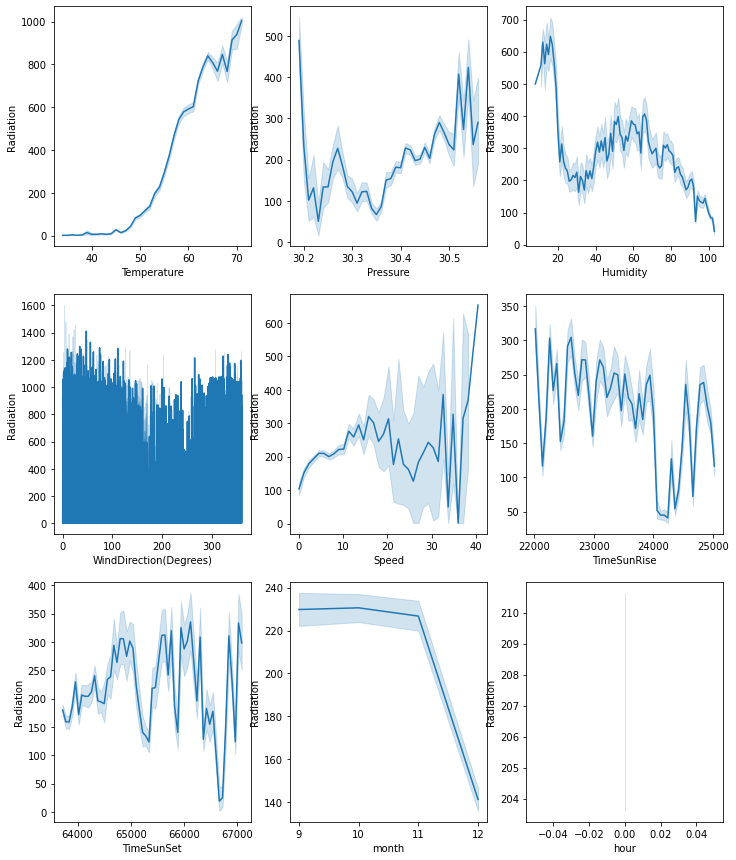

In [9]:
row=3
col=3
fig, axes = plt.subplots(row, col, figsize=(12, 15))
for index, feature in enumerate(solar.columns[1:]):
    print("{0} ".format(index),end="")
    sns.lineplot(data=solar,x=feature,y='Radiation',ax=axes[index//3,index%3])

0 1 2 3 4 5 6 7 8 

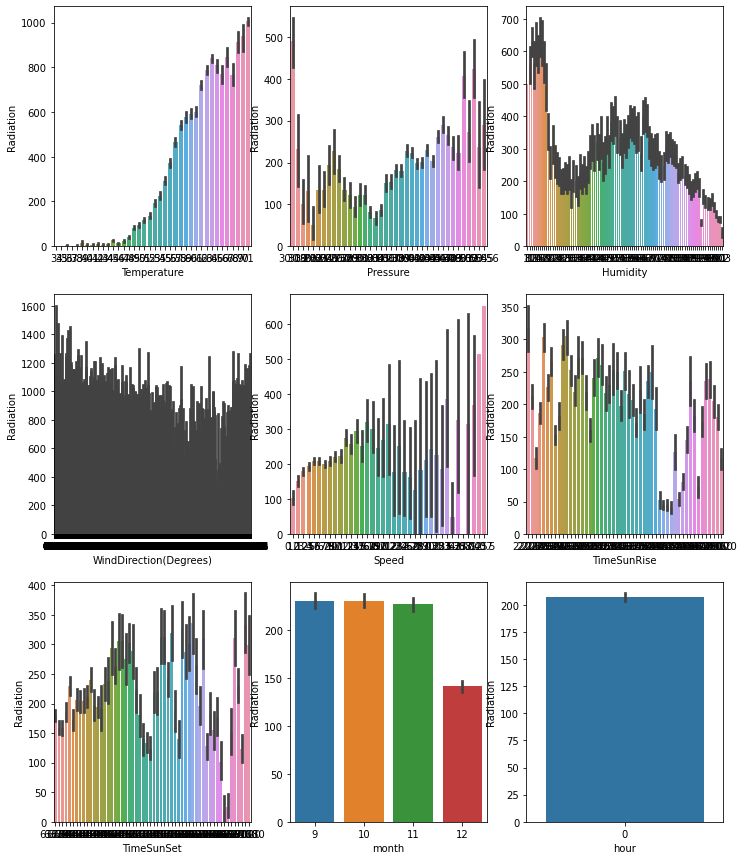

In [10]:
row=3
col=3
fig, axes = plt.subplots(row, col, figsize=(12, 15))
for index, feature in enumerate(solar.columns[1:]):
    print("{0} ".format(index),end="")
    sns.barplot(data=solar,x=feature,y='Radiation',ax=axes[index//3,index%3])

0 1 2 3 4 5 6 7 8 

/home/ippolit/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


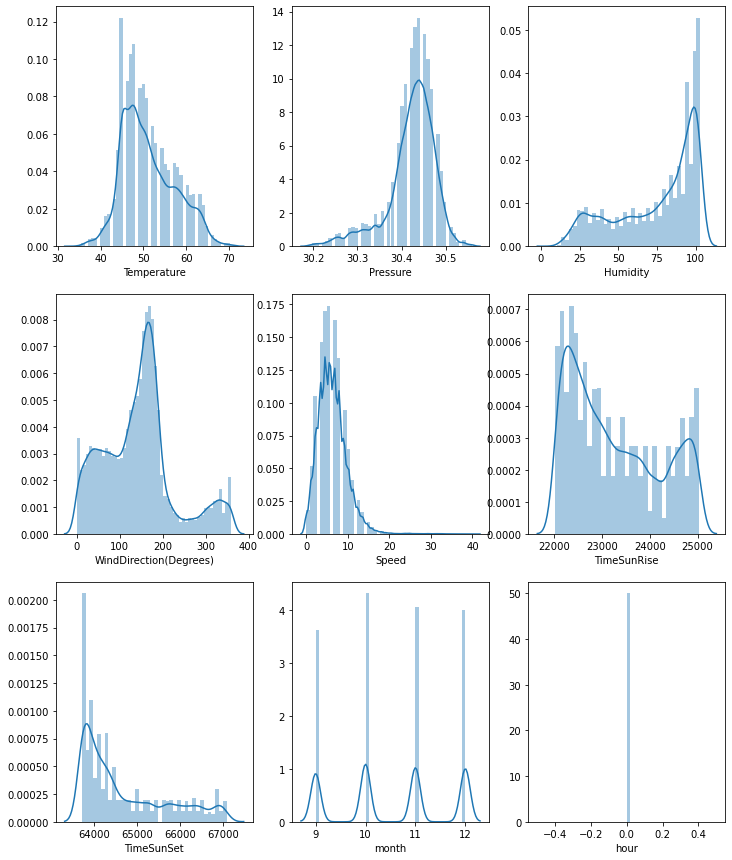

In [11]:
row=3
col=3
fig, axes = plt.subplots(row, col, figsize=(12, 15))
for index, feature in enumerate(solar.columns[1:]):
    print("{0} ".format(index),end="")
    sns.distplot(a=solar[feature],ax=axes[index//3,index%3])

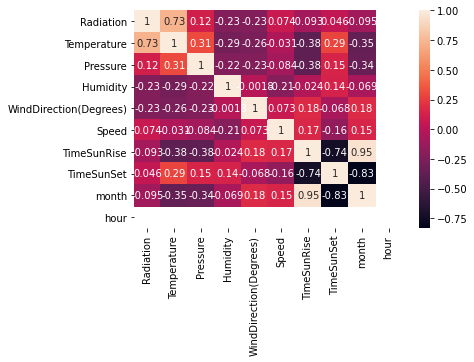

In [12]:
sns.heatmap(data=solar.corr(),annot=True)

Признак hour не дає ніякої інформації,тому видалимо його

In [9]:
solar = solar.drop('hour', 1)

# 3.Вирахувати математичне сподівання  та дисперсію σ для набору даних. Стандартизувати дані

In [10]:
for i in solar:
    print(i,"mean:",np.mean(solar[i]))
    print(i,"var: ",np.var(solar[i]))
    print('\n')

Radiation mean: 207.12469742399261
Radiation var:  99800.11030662451


Temperature mean: 51.10325521630055
Temperature var:  38.45317608899958


Pressure mean: 30.42287890839873
Pressure var:  0.002989062434053097


Humidity mean: 75.01630667564095
Humidity var:  675.4707920376187


WindDirection(Degrees) mean: 143.48982071835067
WindDirection(Degrees) var:  6916.621383092133


Speed mean: 6.243869240652154
Speed var:  12.18303286291278


TimeSunRise mean: 23258.431132594997
TimeSunRise var:  866963.1875566209


TimeSunSet mean: 64691.463623569725
TimeSunSet var:  990100.8682692589


month mean: 10.526066205714985
month var:  1.2026950863583676




In [11]:
solar_normalized=pd.DataFrame(StandardScaler().fit_transform(solar))
solar_normalized.columns=solar.columns
solar_normalized.head()

Radiation  Temperature  Pressure  Humidity  WindDirection(Degrees)  \
0  -0.651811    -0.500439  0.678974 -0.616253                0.407620   
1  -0.651811    -0.500439  0.678974 -0.654730                0.400285   
2  -0.651748    -0.500439  0.678974 -0.693206                0.183490   
3  -0.651811    -0.500439  0.678974 -0.577776               -0.069497   
4  -0.651938    -0.500439  0.678974 -0.500823               -0.463407   

      Speed  TimeSunRise  TimeSunSet    month  
0 -0.178738    -0.943425    0.892967 -1.39154  
1 -0.823359    -0.943425    0.892967 -1.39154  
2 -0.823359    -0.943425    0.892967 -1.39154  
3 -0.823359    -0.943425    0.892967 -1.39154  
4 -0.178738    -0.943425    0.892967 -1.39154

# 4.За допомогою Random Forest моделі визначити інформативність признаків.

In [12]:
from sklearn.ensemble import RandomForestRegressor
X=solar_normalized.iloc[:,1:]
Y=solar_normalized['Radiation']#we will predict radiation
randomForestRegressor=RandomForestRegressor(n_estimators=250,random_state=0)
randomForestRegressor.fit(X,Y.values.ravel())
importances = randomForestRegressor.feature_importances_

Temperature importance: 0.6199135160006647
Pressure importance: 0.057132309134565774
Humidity importance: 0.0882600292041682
WindDirection(Degrees) importance: 0.05942932138815788
Speed importance: 0.027526227035059463
TimeSunRise importance: 0.05027053953608829
TimeSunSet importance: 0.09383808053449803
month importance: 0.0036299771667976984


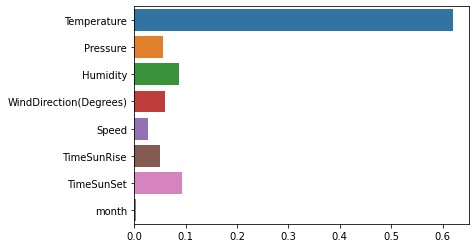

In [17]:
for index,feature in enumerate(X):
    print(f'{feature} importance: {importances[index]}')
sns.barplot(x=importances,y=X.columns,)

# 5.Зменшити розмірність даних за допомогою методу Principal Components Analysis (PCA) до двох вимірів та провести візуалізацію, що вимагається в пункті 2

In [13]:
from sklearn.decomposition import PCA
X_PCA=PCA(n_components=2).fit_transform(X)
solar_PCA=pd.DataFrame(data=X_PCA,columns=['PC1','PC2'])
solar_PCA['Radiation']=solar_normalized['Radiation']
solar_PCA.head()

PC1       PC2  Radiation
0 -1.645506 -0.199744  -0.651811
1 -1.733453 -0.375252  -0.651811
2 -1.771618 -0.298795  -0.651748
3 -1.815435 -0.314637  -0.651811
4 -1.797633 -0.069501  -0.651938

0 PC1
1 PC2


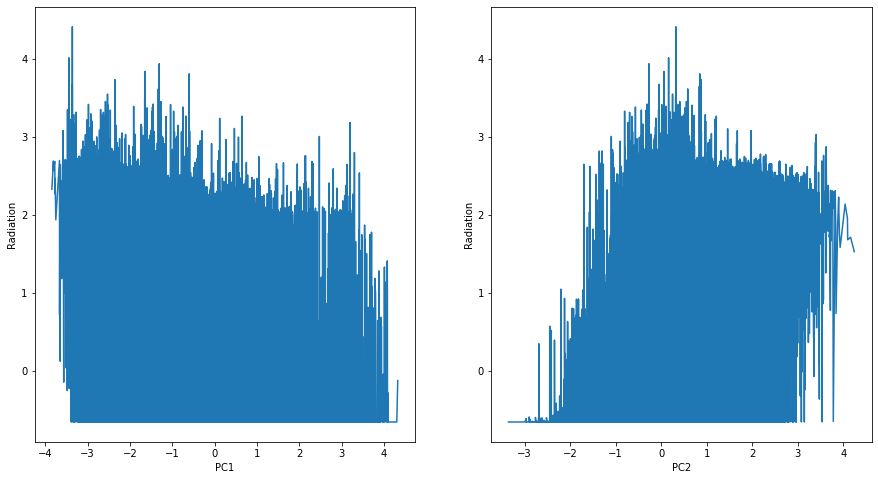

In [19]:
row=1
col=2
fig, axes = plt.subplots(row, col, figsize=(15, 8))
for index,feature in enumerate(solar_PCA.columns[0:2]):
    print(f'{index} {feature}')
    sns.lineplot(data=solar_PCA,x=feature,y='Radiation',ax=axes[index])

0 PC1
1 PC2


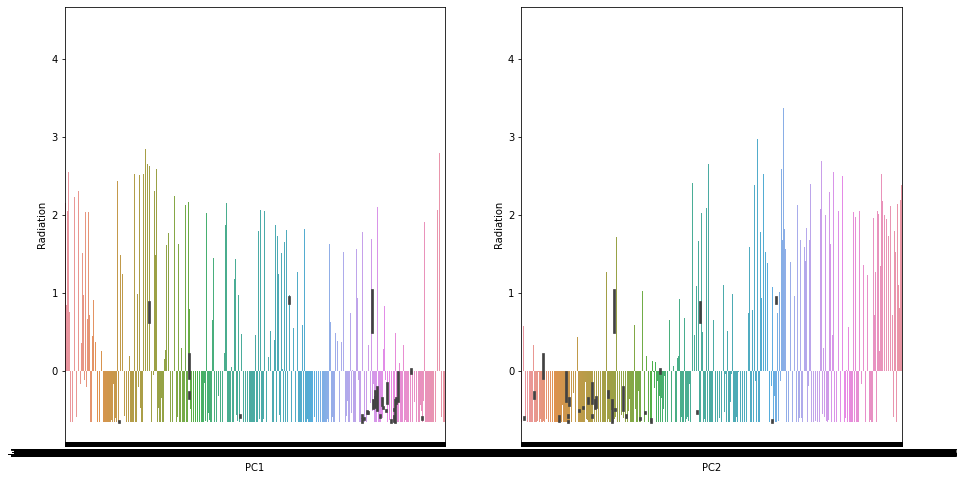

In [20]:
row=1
col=2
fig, axes = plt.subplots(row, col, figsize=(15, 8))
for index,feature in enumerate(solar_PCA.columns[0:2]):
    print(f'{index} {feature}')
    sns.barplot(data=solar_PCA,x=feature,y='Radiation',ax=axes[index])

0 PC1
1 PC2


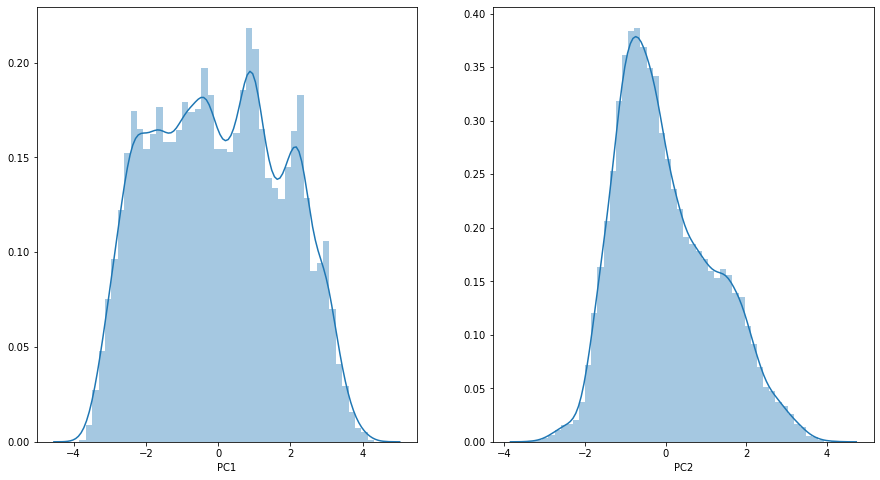

In [21]:
row=1
col=2
fig, axes = plt.subplots(row, col, figsize=(15, 8))
for index,feature in enumerate(solar_PCA.columns[0:2]):
    print(f'{index} {feature}')
    sns.distplot(a=solar_PCA[feature],ax=axes[index])

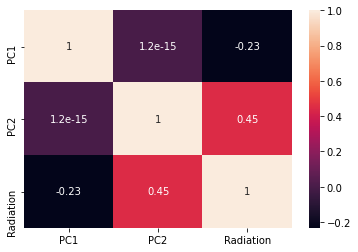

In [22]:
sns.heatmap(data=solar_PCA.corr(),annot=True)

# Вирахувати відсотки дисперсії для власних векторів та визначити скільки потрібно залишити власних векторів, щоб залишилося більше 90% дисперсії.


In [14]:
pca=PCA(n_components=None)
pca.fit(X)
pca.explained_variance_

array([3.14273602, 1.48516656, 1.06046355, 0.83598853, 0.69858128,
       0.50635947, 0.23821491, 0.03273444])

In [15]:
pca.explained_variance_ratio_

array([0.39282998, 0.18564014, 0.13255389, 0.10449537, 0.08731999,
       0.063293  , 0.02977595, 0.00409168])

In [16]:
sum=0.0
for index,ratio in enumerate(pca.explained_variance_ratio_):
    sum+=ratio
    print(f'{index+1} {sum} ')

1 0.392829984444927 
2 0.5784701245321875 
3 0.7110240121855693 
4 0.815519380768973 
5 0.9028393697346231 
6 0.9661323674183203 
7 0.9959083204873111 
8 1.0 


Бачимо,що необхідно залишити перші 5 власні вектори для збереження >90% дисперcії

In [17]:
X_PCA=PCA(n_components=5).fit_transform(X)
solar_PCA_variance=pd.DataFrame(data=X_PCA,
                                columns=['PC1','PC2','PC3','PC4','PC5'])
solar_PCA_variance['Radiation']=solar_normalized['Radiation']
solar_PCA_variance.head()

PC1       PC2       PC3       PC4       PC5  Radiation
0 -1.645506 -0.199744  0.763075 -0.611648 -0.715810  -0.651811
1 -1.733453 -0.375252  0.381662 -1.033793 -0.534689  -0.651811
2 -1.771618 -0.298795  0.251594 -0.910470 -0.523984  -0.651748
3 -1.815435 -0.314637  0.058383 -0.717276 -0.538974  -0.651811
4 -1.797633 -0.069501  0.170721 -0.033168 -0.719082  -0.651938

# 6.Оцінити залежність між набором даних та набором предикторів за допомогою коефіцієнту Пірсона

In [18]:
solar_normalized.head()

Radiation  Temperature  Pressure  Humidity  WindDirection(Degrees)  \
0  -0.651811    -0.500439  0.678974 -0.616253                0.407620   
1  -0.651811    -0.500439  0.678974 -0.654730                0.400285   
2  -0.651748    -0.500439  0.678974 -0.693206                0.183490   
3  -0.651811    -0.500439  0.678974 -0.577776               -0.069497   
4  -0.651938    -0.500439  0.678974 -0.500823               -0.463407   

      Speed  TimeSunRise  TimeSunSet    month  
0 -0.178738    -0.943425    0.892967 -1.39154  
1 -0.823359    -0.943425    0.892967 -1.39154  
2 -0.823359    -0.943425    0.892967 -1.39154  
3 -0.823359    -0.943425    0.892967 -1.39154  
4 -0.178738    -0.943425    0.892967 -1.39154

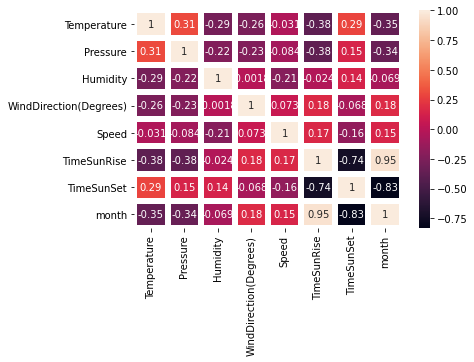

In [19]:
correlation_pearson = solar_normalized[solar_normalized.columns[1:]].corr(method='pearson')
sns.heatmap(correlation_pearson, 
            xticklabels=correlation_pearson.columns,
            yticklabels=correlation_pearson.columns,
            annot=True,
            linewidth=5)

# 7.Використати правило 68-95-99.7 для набору даних, визначити чи розподіл даних є подібним до нормального розподілу. Для цього вирахувати: Pr( µ-1σ ≤ X ≤ µ+1σ),Pr( µ-2σ ≤ X ≤ µ+2σ),Pr( µ-3σ ≤ X ≤ µ+3σ)


In [20]:
solar_PCA_variance.head()

PC1       PC2       PC3       PC4       PC5  Radiation
0 -1.645506 -0.199744  0.763075 -0.611648 -0.715810  -0.651811
1 -1.733453 -0.375252  0.381662 -1.033793 -0.534689  -0.651811
2 -1.771618 -0.298795  0.251594 -0.910470 -0.523984  -0.651748
3 -1.815435 -0.314637  0.058383 -0.717276 -0.538974  -0.651811
4 -1.797633 -0.069501  0.170721 -0.033168 -0.719082  -0.651938

In [21]:
def print_probabilities(df):
    for i,feature in enumerate(df.columns):
        print(f'\n{i+1})feature: {feature}')
        m=df[feature].mean()#математичне сподівання µ
        s=df[feature].std() #дисперсія σ
        print(f'µ = {m}')
        print(f'σ = {s}')
        valids=[0,0,0] #Pr(A)=|{valids}|/|{all}| 
        for j in df[feature].values:
            if (m-s)<=j and j<=(m+s):
                valids[0]+=1
            if (m-2*s)<=j and j<=(m+2*s):
                valids[1]+=1
            if (m-3*s)<=j and j<=(m+3*s):
                valids[2]+=1
        print(f'Pr⁡(µ - 1σ ≤ {feature} ≤ µ + 1σ) =', valids[0] / df.shape[0])
        print(f'Pr⁡(µ - 2σ ≤ {feature} ≤ µ + 2σ) =', valids[1] / df.shape[0])
        print(f'Pr⁡(µ - 3σ ≤ {feature} ≤ µ + 3σ) =', valids[2] / df.shape[0])
print_probabilities(solar_PCA_variance)


1)feature: PC1
µ = 2.4555880658591067e-15
σ = 1.7727763606443876
Pr⁡(µ - 1σ ≤ PC1 ≤ µ + 1σ) = 0.5979318362601725
Pr⁡(µ - 2σ ≤ PC1 ≤ µ + 2σ) = 0.9925350302881968
Pr⁡(µ - 3σ ≤ PC1 ≤ µ + 3σ) = 1.0

2)feature: PC2
µ = 1.467837389024776e-15
σ = 1.218674098390935
Pr⁡(µ - 1σ ≤ PC2 ≤ µ + 1σ) = 0.6686042954169981
Pr⁡(µ - 2σ ≤ PC2 ≤ µ + 2σ) = 0.9590038548614086
Pr⁡(µ - 3σ ≤ PC2 ≤ µ + 3σ) = 0.9991127699932693

3)feature: PC3
µ = 3.531342072391208e-16
σ = 1.0297881069401
Pr⁡(µ - 1σ ≤ PC3 ≤ µ + 1σ) = 0.692743070427706
Pr⁡(µ - 2σ ≤ PC3 ≤ µ + 2σ) = 0.9627975279936364
Pr⁡(µ - 3σ ≤ PC3 ≤ µ + 3σ) = 0.9945542434069632

4)feature: PC4
µ = -5.934422883144012e-16
σ = 0.9143240809557989
Pr⁡(µ - 1σ ≤ PC4 ≤ µ + 1σ) = 0.7188704644190174
Pr⁡(µ - 2σ ≤ PC4 ≤ µ + 2σ) = 0.9518142323930735
Pr⁡(µ - 3σ ≤ PC4 ≤ µ + 3σ) = 0.9929327540843175

5)feature: PC5
µ = 1.650389357630537e-16
σ = 0.8358117516627309
Pr⁡(µ - 1σ ≤ PC5 ≤ µ + 1σ) = 0.669063207489445
Pr⁡(µ - 2σ ≤ PC5 ≤ µ + 2σ) = 0.9604417793550756
Pr⁡(µ - 3σ ≤ PC5 ≤ µ +

# 8.Видалити з набору даних всі дані, для яких Pr( µ-3σ ≤ X ≤ µ+3σ)>0.9973

Можна побачити,що Pr( µ-3σ ≤ X ≤ µ+3σ)>0.9973 мають ознаки PC1,PC2,Radiation.Але ознака Radiation наш цільова ознака,тому видаляти її не будемо.

In [22]:
solar_filter=solar_PCA_variance.copy()
solar_filter=solar_filter.drop(columns=['PC1','PC2'])
solar_filter.head()

PC3       PC4       PC5  Radiation
0  0.763075 -0.611648 -0.715810  -0.651811
1  0.381662 -1.033793 -0.534689  -0.651811
2  0.251594 -0.910470 -0.523984  -0.651748
3  0.058383 -0.717276 -0.538974  -0.651811
4  0.170721 -0.033168 -0.719082  -0.651938

# 9.Провести тест Колмогорова-Смірнова

In [23]:
from scipy.stats import kstest
solar_filter.head()

PC3       PC4       PC5  Radiation
0  0.763075 -0.611648 -0.715810  -0.651811
1  0.381662 -1.033793 -0.534689  -0.651811
2  0.251594 -0.910470 -0.523984  -0.651748
3  0.058383 -0.717276 -0.538974  -0.651811
4  0.170721 -0.033168 -0.719082  -0.651938

In [24]:
def check_hypotesis(df,feature,statistic,alpha=0.05):
    n=df.shape[0]
    m=df.shape[1]
    mark=(1/np.sqrt(n))*np.sqrt(-np.log(alpha/2))
    print('\n')
    print(f'feature = {feature}')
    print(f'mark = {mark}')
    print(f'stat = {statistic}')
    if statistic>mark:
        print(f'statistic > mark => гіпотеза відкидається')
    else:
        print(f'statistic ≤ markгіпотеза приймається')

In [25]:
for feature in solar_filter.columns:
    statistic=kstest(solar_filter[feature],'norm').statistic
    check_hypotesis(solar_filter,feature,statistic,0.05)



feature = PC3
mark = 0.010623468721951683
stat = 0.021914622407509243
statistic > mark => гіпотеза відкидається


feature = PC4
mark = 0.010623468721951683
stat = 0.044038699010426924
statistic > mark => гіпотеза відкидається


feature = PC5
mark = 0.010623468721951683
stat = 0.05611959195962754
statistic > mark => гіпотеза відкидається


feature = Radiation
mark = 0.010623468721951683
stat = 0.2945705691884847
statistic > mark => гіпотеза відкидається


# Реалізувати та навчити різні моделі з різною архітектурою для розв’язання поставленої задачі класифікації \ регресії. На основі аналізу їх результатів вибрати найкращі моделі та ансамблювати їх для отримання більш стійкого результату.


In [37]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, TweedieRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [27]:
df=solar_filter.copy()
df.head()

PC3       PC4       PC5  Radiation
0  0.763075 -0.611648 -0.715810  -0.651811
1  0.381662 -1.033793 -0.534689  -0.651811
2  0.251594 -0.910470 -0.523984  -0.651748
3  0.058383 -0.717276 -0.538974  -0.651811
4  0.170721 -0.033168 -0.719082  -0.651938

In [28]:
X=df.drop('Radiation',axis=1)
Y=df['Radiation']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state =0)

In [38]:
regression_models=[Lasso(),
                   Ridge(),
                   ElasticNet(),
                   TweedieRegressor(),
                   MLPRegressor(),
                   KNeighborsRegressor(),
                   SVR(),
                   RandomForestRegressor()]
mean_squared_errors_train=[]
mean_squared_errors_test=[]
r2_train=[]
r2_test=[]
models_handles=[]
for i,model in enumerate(regression_models):
    print(f'{i}. {model}')
    reg_model=model
    reg_model.fit(X_train,Y_train)
    Y_predict_train=reg_model.predict(X_train)
    Y_predict_test=reg_model.predict(X_test)
    mean_squared_errors_train.append(mean_squared_error(Y_train,Y_predict_train))
    mean_squared_errors_test.append(mean_squared_error(Y_test,Y_predict_test))
    r2_train.append(r2_score(Y_train,Y_predict_train))
    r2_test.append(r2_score(Y_test,Y_predict_test))
    models_handles.append(reg_model)

0. Lasso()
1. Ridge()
2. ElasticNet()
3. TweedieRegressor()
4. MLPRegressor()
5. KNeighborsRegressor()
6. SVR()
7. RandomForestRegressor()


In [39]:
models_handles

[Lasso(),
 Ridge(),
 ElasticNet(),
 TweedieRegressor(),
 MLPRegressor(),
 KNeighborsRegressor(),
 SVR(),
 RandomForestRegressor()]

In [43]:
models_score=pd.DataFrame(data={'model':regression_models,
                              'mse_train':mean_squared_errors_train,
                              'mse_test':mean_squared_errors_test,
                              'r2_train':r2_train,
                              'r2_test': r2_test})
models_score

model  mse_train  mse_test  \
0                                            Lasso()   1.004839  0.995197   
1                                            Ridge()   0.781269  0.785994   
2                                       ElasticNet()   1.004839  0.995197   
3                                 TweedieRegressor()   0.857699  0.854050   
4                                     MLPRegressor()   0.613262  0.620247   
5                              KNeighborsRegressor()   0.459224  0.697952   
6                                              SVR()   0.671683  0.682245   
7  (DecisionTreeRegressor(max_features='auto', ra...   0.091583  0.649670   

   r2_train   r2_test  
0  0.000000 -0.000071  
1  0.222493  0.210156  
2  0.000000 -0.000071  
3  0.146432  0.141767  
4  0.389691  0.376715  
5  0.542987  0.298629  
6  0.331551  0.314413  
7  0.908858  0.347147

Нехай візьмемо моделі DecisionTreeRegressor,SVR,KNeighborsReggessor,бо вони мають більш менш найменші похибки з всіх

In [44]:
models_score.iloc[[5,6,7]]

model  mse_train  mse_test  \
5                              KNeighborsRegressor()   0.459224  0.697952   
6                                              SVR()   0.671683  0.682245   
7  (DecisionTreeRegressor(max_features='auto', ra...   0.091583  0.649670   

   r2_train   r2_test  
5  0.542987  0.298629  
6  0.331551  0.314413  
7  0.908858  0.347147

In [42]:
voting=VotingRegressor([('KNeighborsRegressor' , models_handles[5]),
                        ('SVR',models_handles[6]),
                        ('DecisionTree',models_handles[7])])
voting.fit(X_train,Y_train)
Y_predict=voting.predict(X_test)
print(f"mean squared error: {mean_squared_error(Y_test,Y_predict)}")
print(f"r2 score: {r2_score(Y_test,Y_predict)}")

mean squared error: 0.6262572736886994
r2 score: 0.3706752173143216


# Аналіз результатів

# 1.Вплив відновлення пропущених значень порівняно з видаленням їх з вибірки
Данний датасет не містив пропущені значення або NaN.Тобто впливу не відбулось.

# 2.Аналіз побудованих графіків та гістограм для різних ознак
Було побудовано типи графіків lineplot,barplot,distplot,heatmap.
На lineplot'і можна побачити,що ознаки нелінійно залежать відносно Radiation.
На barplot'і можна як розрідженні одні значення від інших і на скільки.
На distplot можна побачити розподіл одних значень від інших.
На heatmap можна побачити що в основному ознаки майже не корелюють або слабо коррелюють,оскільки значення кореляції приймають значення в околі нуля.


# 3.Аналіз отриманих даних після застосування алгоритму зменшення розмірності
Спочатку ми стандартизували дані за допомогою StandartScaler.
Потім за допомогою PCA зменшили розмірність признаків до двох.
Помітну різницю в представленні данних можна помітити на нових графіках з ознаками PC1 та PC2.
На lineplot ознаки стали більш розрідженними по всій площині.
На barplot розрідженість данних змінилась.
Гістограмма стала більш схожою на нормальний розподіл.
Матриця корреляції за ознаками є або некоррельованою,або слабо коррельованою


# 4.Аналіз впливу зменшення розмірності даних на точність моделі
На точність моделі зменшення розмірності вплинуло не значно,оскільки ми прибрали надлишковість данних.

# 5.Аналіз залежності між предикторами та досліджуваною величиною
Подивившись на матрицю корреляції,де застосували метод Пірсона можна побачити,що ознаки є некоррельовані,тобто значення знаходяться в околі нуля,або слабо коррельовані,тобто значення знаходяться в межах (-0.6,-0.2) та (0.2,0.6)

# 6.Аналіз розподілу вхідних даних, аналіз викидів, після переведення його до нормального, за правилом 68-95-99.7.
Вхідні дані мали такі статистичні характеристики наведені нижче.
За правилом 68-95-99.7 ми обрахували ймовірності того випадкова величина належить інтервалу (µ - 3σ,µ + 3σ).Далі ми видалили ті стовпці данних,які мали ймовірність Pr( µ-3σ ≤ X ≤ µ+3σ)>0.9973.
Таким умовам задовільняє стовпці PC1 та PC2


In [61]:
for i in solar:
    print(i,"mean:",np.mean(solar[i]))
    print(i,"var: ",np.var(solar[i]))
    print('\n')

Radiation mean: 207.12469742399261
Radiation var:  99800.11030662451


Temperature mean: 51.10325521630055
Temperature var:  38.45317608899958


Pressure mean: 30.42287890839873
Pressure var:  0.002989062434053097


Humidity mean: 75.01630667564095
Humidity var:  675.4707920376187


WindDirection(Degrees) mean: 143.48982071835067
WindDirection(Degrees) var:  6916.621383092133


Speed mean: 6.243869240652154
Speed var:  12.18303286291278


TimeSunRise mean: 23258.431132594997
TimeSunRise var:  866963.1875566209


TimeSunSet mean: 64691.463623569725
TimeSunSet var:  990100.8682692589


month mean: 10.526066205714985
month var:  1.2026950863583676




# 7.Аналіз результатів тесту Колмогорова-Смірнова
Результат тесту Колмогорова-Смірнова показав,що данна вибірка не належить до нормального розподілу.
Також у розрахунку оцінки було опущено множник (1+m/n)/2, оскільки це призводило до взяття кореня від від`ємного числа

# 8.Як підрахунок різних точностей описує поведінку навчених моделей
Для оцінювання точності використовувалось mean square error для різних моделей.
Також асамблюючи моделі,які показали найбільшу точність,ми досягнемо того,що ми отримаємо більш стійку модель з прийнятною точністю

# 9.Вибір оптимальних параметрів моделі, їх обґрунтування
Всі моделі,що використовувались,були ініціалізовані за замовченням,оскільки в середньому такі моделі дають більш менш сприятливий результат. 

# 10.Оцінка помилок на навчальній та тестовій вибірках
Результування моделей вимірювалось за допомогою метрики mean square error та R квадрат.
Оцінки можна побачити в таблиці models_mse.
Найбільш гарні результати показав DecisionTreeRegressot.
Найгірше себе проявив Lasso та ElasticNet.

In [45]:
models_score

model  mse_train  mse_test  \
0                                            Lasso()   1.004839  0.995197   
1                                            Ridge()   0.781269  0.785994   
2                                       ElasticNet()   1.004839  0.995197   
3                                 TweedieRegressor()   0.857699  0.854050   
4                                     MLPRegressor()   0.613262  0.620247   
5                              KNeighborsRegressor()   0.459224  0.697952   
6                                              SVR()   0.671683  0.682245   
7  (DecisionTreeRegressor(max_features='auto', ra...   0.091583  0.649670   

   r2_train   r2_test  
0  0.000000 -0.000071  
1  0.222493  0.210156  
2  0.000000 -0.000071  
3  0.146432  0.141767  
4  0.389691  0.376715  
5  0.542987  0.298629  
6  0.331551  0.314413  
7  0.908858  0.347147

# 11.Вибір найкращих моделей для ансамблювання на основі їх точностей та вибір всіх моделей для ансамблювання
Моделі,що показали найкращій результат - це DecisionTree.Моделі,що показали більш менш результат - це KNeighborsRegressor та SVR. Всі інші моделі показали гірший результат. Вибір засновувався на результатах метрик метод найменших квадратів та R квадрат.Таким чином було обрано три моделі на ансамблювання: KNeighborsRegressor,SVR,DecisionTree.

# 12.Порівняння точності ансамблю та найкращої моделі
Модель з найкращим результатом - DecisionTree.Ця модель на тестовійй вибірці мала оцінку 0.64 на mse та 0.34 на R^2.
Ансамблювання було здійснено за допомогою VotingRegressor від трьох моделей:KNeighborsRegressor,SVR,DecisionTree. Ансамбль на тестовій вибірці показав результат 0.62 на mse та 0.37 на R^2.
Оцінка на тестовій вибірці ансамблю стала трохи кращою ніж на DesicionTree, але не на багато.

# Висновок
Отже,під час виконання курсової работи я навчився та поглибив знання з аналізу данних та використанням методів машинного навчання.Навчився таким речам:вираховувати математичне сподівання та дисперсію заданого набору данних,визначати інформативність признаків за допомогою RandomForest,зменшувати розмірність вхідних ознак,проводити тест Колмогорова-Смірнова.Також поглибив знання з реалізації моделей машинного навчання та ансамблювання моделей.